# $Telco Project Data$

### Imports

In [1]:
import pandas as pd
import numpy as np
import wrangle as w
import matplotlib.pyplot as plt
import scipy.stats as stats

# to see all columns in wide datasets
pd.set_option('display.max_columns', None)

import seaborn as sns

# train test split from sklearn
from sklearn.model_selection import train_test_split


In [2]:
# acquire telco data 
df = w.get_telco_data()

In [3]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [4]:
df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [5]:
df.shape


(7043, 24)

In [6]:
df.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

# prepare

In [7]:
# cleaning data
df = w.prep_telco(df)

In [8]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1



df[df.contract_type != 'Month-to-month']

In [9]:
df.shape

(7032, 61)

In [10]:
def split_telco_data(df):
    '''
    This function split telco data into train , validate, test and  stratifies on churn.
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    Returns train, validate, and test 
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [11]:
# split data
train, validate, test = split_telco_data(df)
train.shape,validate.shape, test.shape



((3937, 61), (1688, 61), (1407, 61))

# How often does churn occur?

# plt.title('Churn Mean')
sns.barplot(x=len(train.churn_Yes), y = train.churn_Yes., data = train,ci=False,saturation=.9, palette="PuRd_r")
col_mean= train.churn.mean()
plt.axhline(col_mean, label = 'Churn mean',color='maroon')
plt.legend()
plt.show()

In [12]:
mean = train.churn.value_counts().mean()
mean

1968.5

In [13]:
def get_churn_mean_bar(df): 
    mean = df.churn.value_counts().mean()
    plt.title(f'Churn Mean : {mean}')
    sns.countplot(df.churn)
    col_mean= df.churn.value_counts().mean()
    plt.axhline(col_mean, label = 'Churn mean',color='maroon')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


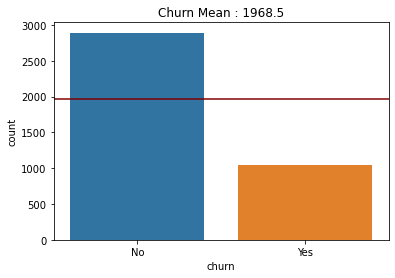

In [14]:
get_churn_mean_bar(train)

In [15]:
train.churn.value_counts(normalize=True)

No     0.734315
Yes    0.265685
Name: churn, dtype: float64

### It appears that about 26% of telco customers churn.

In [16]:
# Baseline????

# Does having a high monthly charge affect churn?

<AxesSubplot:title={'center':'Monthly Charges vs Churn'}, xlabel='monthly_charges', ylabel='Count'>

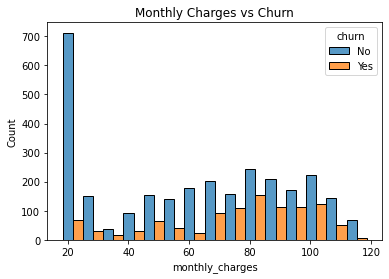

In [17]:
plt.title('Monthly Charges vs Churn')
sns.histplot(x='monthly_charges', data=train, hue='churn',multiple='dodge')

### I appears that monthly charges has some bearing on customer churn. Customers who have less monthly charges appear to have stayed with Telco.


#  Do Senior Citizens churn more than non-Senior Citizens?

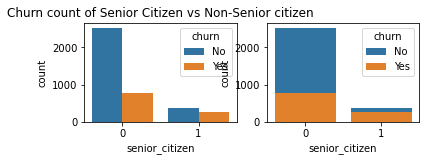

In [84]:
# (x='color', data=diamonds, hue='clarity'
plt.title('Churn count of Senior Citizen vs Non-Senior citizen')

plt.subplot(221)
plt.title('Churn count of Senior Citizen vs Non-Senior citizen')
sns.countplot(x=train.senior_citizen, data=train, hue = 'churn')


plt.subplot(222)
sns.countplot(x=train.senior_citizen, data=train, hue = 'churn',dodge=False)
plt.show()

Do customers who are consider seniors churn more than customers who are not seniors?

Variables:

    * seniors (discrete)
    * churn (discrete)
    
Test: chi^2

$H_0$: There is **no** relationship between a customers with senior status and churn.

$H_a$: There is a relationship between a customers senior status and churn.

In [18]:
# Chi-Square test to compare two categorical variables (Sex and Survival)

alpha = 0.05

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.senior_citizen==1, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis


1.7561315684822695e-23

### Since we reject the null hypethesis there seems to be a relationship between senior citizens and churn.

# Does tenure affect churn?

<AxesSubplot:title={'center':'Tenure vs Churn'}, xlabel='churn', ylabel='tenure'>

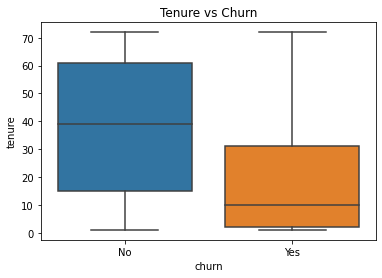

In [85]:
plt.title('Tenure vs Churn')
sns.boxplot(y=train.tenure, x=train.churn,
            whis=np.inf
           )

In [94]:
train.contract_type.value_counts()

Month-to-month    2165
Two year           957
One year           815
Name: contract_type, dtype: int64

# Does the contract type of customer affect churn?

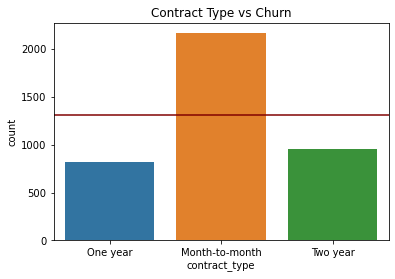

In [96]:
plt.title('Contract Type vs Churn')
sns.countplot(x=train.contract_type, data=train)
col_mean= train.contract_type.value_counts().mean()
plt.axhline(col_mean, label = 'Churn mean',color='maroon')

# Do Senior Citizens pay more monthly charges that non Senior Citizens?

<AxesSubplot:title={'center':'High monthly charges Drive Senior Citizens to Churn'}, xlabel='senior_citizen', ylabel='monthly_charges'>

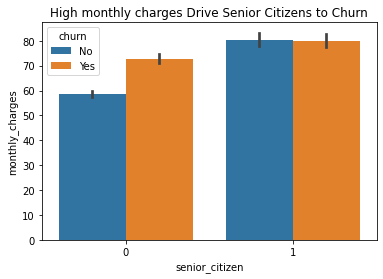

In [19]:
plt.title('High monthly charges Drive Senior Citizens to Churn')
sns.barplot(data= train, x='senior_citizen', y='monthly_charges', hue = 'churn')

Hypothesis for Senior citizens and Monthly charges
Do customers who are consider seniors pay more monthly charges than customers who are not seniors? 

Variables:
* seniors (discrete)
* month charges(continuous)

Test: two sample, one tail, scipy.stats.ttest_ind

$H_0$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

$H_a$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

In [20]:
total_charges_seniors = train[train.senior_citizen==1].total_charges
total_charges_nonseniors = train[train.senior_citizen==0].total_charges

In [26]:
total_charges_seniors.var(),total_charges_nonseniors.var()

(5790251.037615047, 5042349.88999738)

In [23]:
# # stats Levene test - returns p value. small p-value means unequal variances
stat, pval = stats.levene(total_charges_seniors, total_charges_nonseniors)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equal_var to False')
pval

inequal variance ==> set equal_var to False


3.1878395780060806e-05

In [27]:
alpha = 0.05

t_stat, p_val = stats.ttest_ind(total_charges_seniors, total_charges_nonseniors, equal_var = False)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:17.342703226071816
 p-value:3.1878395780060806e-05
we can reject H0 

Because the p-value (2.0722062265570932e-10) is less than alpha value (0.05), we reject the null hypothesis


### Summary:
### Since we reject the null hypothesis, there seems to be significant findings that senior citizens on average do pay more Monthly Charges than non senior citizens.m

In [ ]:

# prepare data
telco_df = w.prep_telco(df)

# drop columns
telco_df =telco_df.drop(columns={'customer_id',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing',
                                     'gender',
                                     'partner',
            
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type'})
# split data
telco_train, validate, test = w.split_telco_data(telco_df)
telco_train.shape,validate.shape, test.shape

#seperate target
x_train = telco_train.drop(columns=['churn','churn_No','churn_Yes'])
y_train = telco_train.churn_Yes

x_validate = validate.drop(columns=['churn','churn_No','churn_Yes'])
y_validate = validate.churn_Yes

x_test = test.drop(columns=['churn','churn_No','churn_Yes'])
y_test = test.churn_Yes

x_train, x_validate, x_test = w.impute_mean_total_charges(x_train, x_validate, x_test)

In [ ]:
#seperate target
x_train = telco_train.drop(columns=['churn','churn_No','churn_Yes'])
y_train = telco_train.churn_Yes

x_validate = validate.drop(columns=['churn','churn_No','churn_Yes'])
y_validate = validate.churn_Yes

x_test = test.drop(columns=['churn','churn_No','churn_Yes'])
y_test = test.churn_Yes

x_train, x_validate, x_test = w.impute_mean_total_charges(x_train, x_validate, x_test)

In [ ]:
x_train.shape, x_validate.shape, x_test.shape